In [3]:
# for TensorFlow
!pip install "python-doctr[tf]"
# for PyTorch
!pip install "python-doctr[torch]"
# optional dependencies for visualization, html, and contrib modules can be installed as follows:
!pip install "python-doctr[torch,viz,html,contib]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.5/299.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 51.8 MB/s eta 0:00:00
   ━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-

In [1]:
# Loading a pretrained model for our task
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/94122142 [00:00<?, ?it/s]

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


  0%|          | 0/58758994 [00:00<?, ?it/s]

In [3]:
from doctr.io import DocumentFile

# Image
single_img_doc = DocumentFile.from_images("sample.jpeg")


In [4]:
# higlighting all the text in image tobegin with

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)


result = model(single_img_doc)

  0%|          | 0/60957071 [00:00<?, ?it/s]

In [6]:
from PIL import Image

In [8]:
import matplotlib.pyplot as plt


In [10]:
!pip install mplcursors

  Using cached mplcursors-0.5.3.tar.gz (88 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 50.6 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20727 sha256=b86d0ec1b47ce09df598687c517930f52a3f4b9478ca308d91bb1277a273d239
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


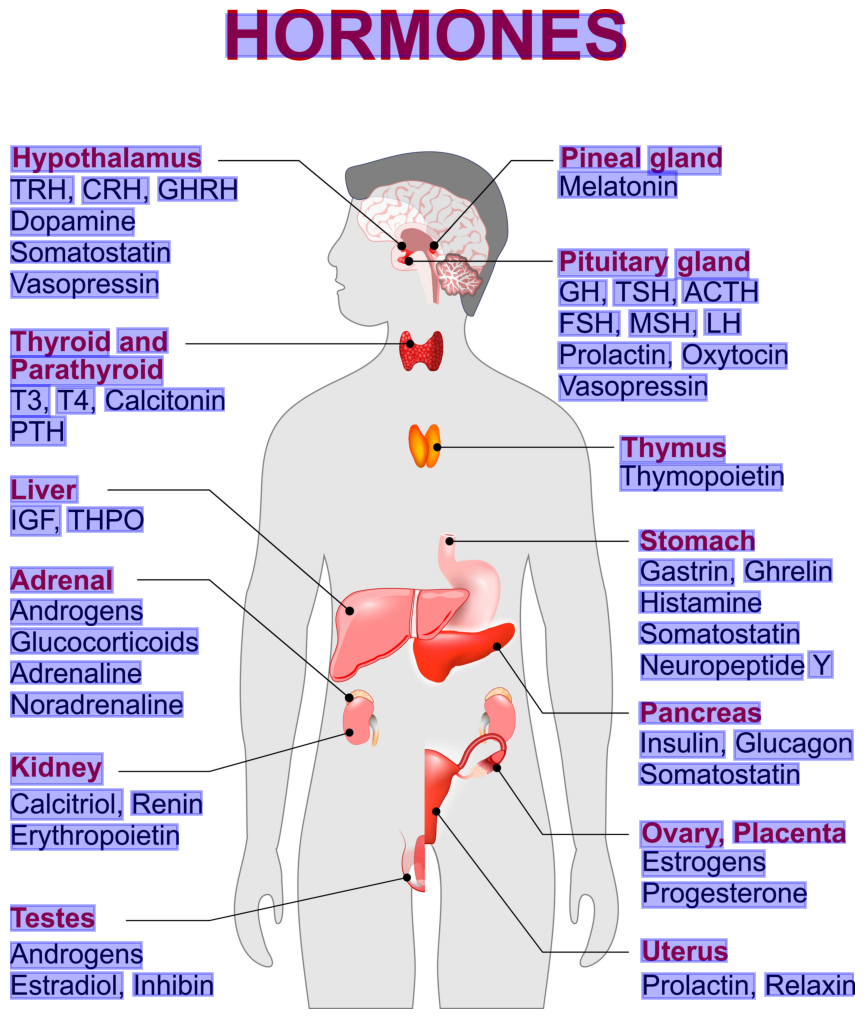

In [11]:
# to display the text-highlighted image
result.show()

In [24]:
import cv2
import numpy as np
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from sklearn.cluster import DBSCAN

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

image_path = "sample.jpeg"  
image = cv2.imread(image_path)


doc = DocumentFile.from_images(image_path)
result = model(doc)

# Extract predictions from the image
page = result.pages[0]
predictions = page.blocks

# List to store text and its corresponding bounding box center
text_boxes = []

# making bouding boxes to bound the text into regions to be clustered together
for block in predictions:
    for line in block.lines:
        text = " ".join([word.value for word in line.words])
        # Get the average bounding box center for this text line
        x_min, y_min, x_max, y_max = line.geometry[0][0], line.geometry[0][1], line.geometry[1][0], line.geometry[1][1]
        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        text_boxes.append((text, x_center, y_center))

# Convert the list to a NumPy array for clustering
positions = np.array([[x, y] for _, x, y in text_boxes])

# Perform clustering using DBSCAN (adjust epsilon and minimum samples based on how tight/loose clusters should be)
dbscan = DBSCAN(eps=0.05, min_samples=2).fit(positions)  # eps defines neighborhood size, min_samples defines the core points

# Group texts by their cluster labels
clustered_texts = {}
for i, (text, x_center, y_center) in enumerate(text_boxes):  
    cluster_label = dbscan.labels_[i]
    if cluster_label == -1:
        continue
    if cluster_label not in clustered_texts:
        clustered_texts[cluster_label] = []
    clustered_texts[cluster_label].append(text)

# Output the grouped text by cluster
for cluster, texts in clustered_texts.items():
    print(f"Cluster {cluster + 1}:")
    print("\n".join(texts))
    print("\n")


Cluster 1:
Hypothalamus
TRH, CRH, GHRH


Cluster 2:
Pineal gland
Melatonin


Cluster 3:
Dopamine
Somatostatin
Vasopressin


Cluster 4:
Pituitary gland
GH, TSH, ACTH
FSH, MSH, LH
Prolactin, Oxytocin


Cluster 5:
Thyroid and
Parathyroid
T3, T4, Calcitonin


Cluster 6:
Thymus
Thymopoietin


Cluster 7:
Liver
IGF, THPO


Cluster 8:
Adrenal
Androgens
Glucocorticoids
Adrenaline
Noradrenaline


Cluster 9:
Histamine
Somatostatin
Neuropeptide Y


Cluster 10:
Insulin, Glucagon
Somatostatin


Cluster 11:
Calcitriol, Renin
Erythropoietin


Cluster 12:
Estrogens
Progesterone


Cluster 13:
Testes
Androgens


